In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist
from keras.utils import to_categorical

import keras
from keras import layers
from keras import models
import tensorflow as tf

from tensorflow.keras.applications import VGG16

c:\Users\oscar.torresrodrigue\AppData\Local\miniconda3\envs\tensorflow\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

val_images = train_images[:6000]
val_labels = train_labels[:6000]

train_images = train_images[6000:]
train_labels = train_labels[6000:]

In [3]:
# En la documentacion dice que tiene que tener 3 canales y bgr
def procesa_imagenes(dataset):
  new_dataset = []
  for img in dataset:
    img = cv.resize(img, (56, 56))
    img = cv.cvtColor (img, cv.COLOR_GRAY2BGR)
    new_dataset.append(img)
  return np.array(new_dataset)

In [4]:
train_images = procesa_imagenes(train_images)
test_images = procesa_imagenes(test_images)
val_images = procesa_imagenes(val_images)

### Escalar las imagenes

In [5]:
train_images = train_images.astype("float32")/255
test_images = test_images.astype("float32")/255
val_images = val_images.astype("float32")/255

In [6]:
train_images.shape

(54000, 56, 56, 3)

In [7]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)

In [8]:
train_labels.shape

(54000, 10)

### Entrenamiento del modelo

In [9]:
# Para cargar este modelo en concreto hay que pasarle unas dimensiones especificas o indicarle las dimensiones que vamos a usar
# imagenet: Es un dataset con millones de fotos
# pre_trained_model = VGG16(input_shape=(56,56,3),weights="imagenet",include_top= False)

# for layer in pre_trained_model.layers:
#   layer.trainable = False

# pre_trained_model.summary()

In [10]:
pre_trained_model = VGG16(input_shape=(56,56,3),
                          weights = "imagenet",
                          include_top = False)

pre_trained_model.trainable = True

trainable = False
for layer in pre_trained_model.layers:
  if layer.name == "block5_conv1":
    trainable = True
  layer.trainable = trainable

pre_trained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 56, 56, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 56, 56, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 14, 14, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [11]:
# Crear nuestro propio modelo
model = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax"),
])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [13]:
from keras.optimizers import Adam
adam = Adam(learning_rate=0.005)
model.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])

In [20]:
# Con 6 epochs ya no mejora en la ultima prueba realizada
epochs = 6
batch_size = 100
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

history = model.fit(train_images,train_labels,batch_size=batch_size, epochs=epochs, validation_data=(val_images,val_labels))

540/540 ━━━━━━━━━━━━━━━━━━━━ 407s 753ms/step - accuracy: 0.9928 - loss: 0.0280 - val_accuracy: 0.9852 - val_loss: 0.0662


<Axes: >

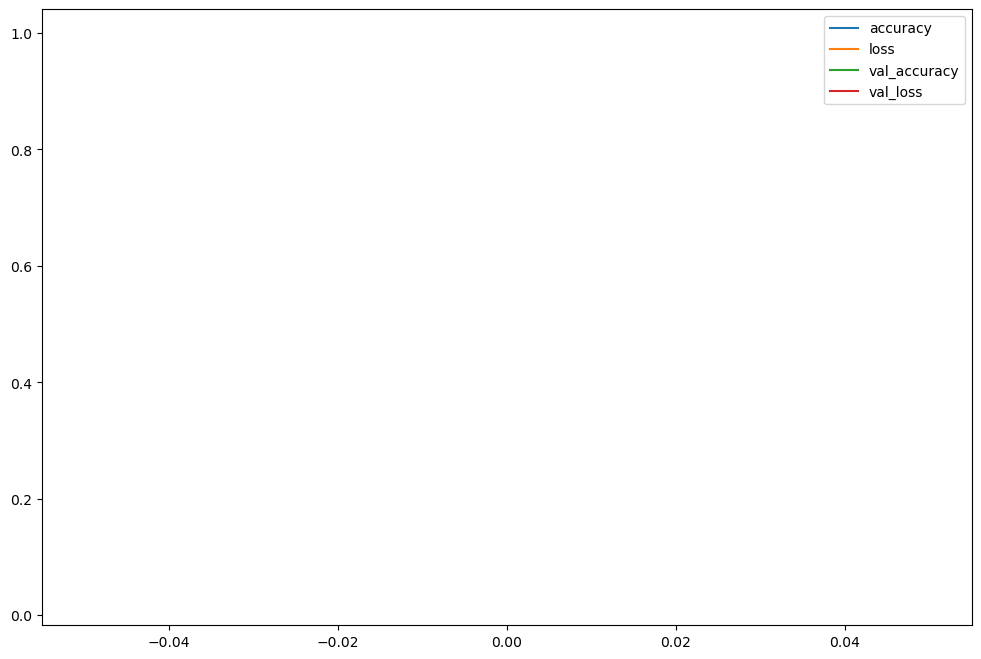

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(12,8))

In [19]:
model.evaluate(test_images,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 155ms/step - accuracy: 0.9818 - loss: 0.0725


[0.060354720801115036, 0.9854999780654907]